<html>
<head>
	<title></title>
</head>
<body>
<h2 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ»
Кафедра «РЗиАЭ»</h2>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №3</h2>

<h3 style="text-align: center;line-height: 80%;"><em>РЕШАЮЩЕЕ ДЕРЕВО. КОМПОЗИЦИИ РЕШАЮЩИХ ДЕРЕВЬЕВ. МНОГОСЛОЙНЫЙ ПЕРЦЕПТРОН.</em></h3>

<p style="text-align: right;line-height: 40%;">Выполнил: студент группы Э-13м-21</p>

<p style="text-align: right;line-height: 40%;">Груздов А.Г.</p>

<p style="text-align: right;line-height: 40%;">Проверил: Нухулов С.М., Малютин М.С.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2022</em></h3>
</body>
</html>

<h2>Целью работы</h2>

является получение практических навыков работы с моделями решающего дерева, композиций решающих деревьев и нейронных
сетей в программной среде Python.
<ol>
<li>Анализ, предварительную предобработку и визуализацию данных.</li>
<li>Обучение и применение моделей решающего дерева, случайного леса, градиентного бустинга и нейронных сетей с оптимальными параметрами на двух наборах данных.</li>
<li>Построение и визуализация метрики качества для обучающегонабора данных и тестового.</li>
</ol>

In [2]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Чтение файла датасета
df = pd.read_csv('source/income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h3> Пункт 2.1-2.2: воспользуемся методами isnull() и sum() класса DataFrame. воспользуемся методом класса hist()</h3>


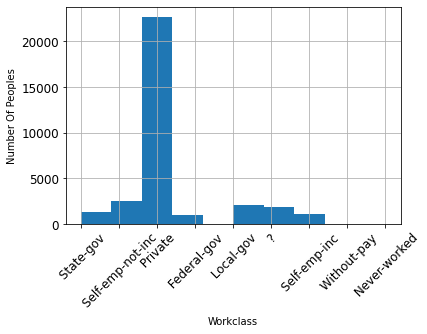

In [2]:
df['workclass'].hist(xlabelsize=12, xrot=45, ylabelsize=12)
plt.xlabel('Workclass')
plt.ylabel("Number Of Peoples");

<h3> Пункт 2.3 Визуализировать совмещенные гистограммы объектов по признаку «income» для двух значений признака «sex» на одном графике.</h3>

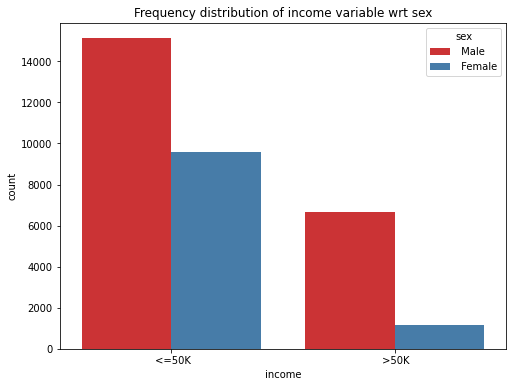

In [3]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

<h3> Пункт 2.4 Визуализировать совмещенные гистограммы объектов по признаку «income» для всех значений признака «race» на одном графике.</h3>

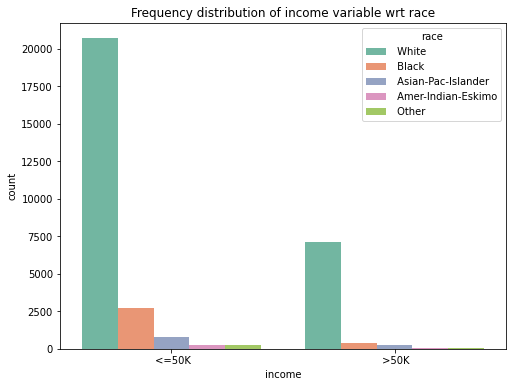

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

<h3> Пункт 2.5 Визуализировать совмещенные гистограммы объектов по признаку «workclass» для двух значений признака «income» на одном.</h3>

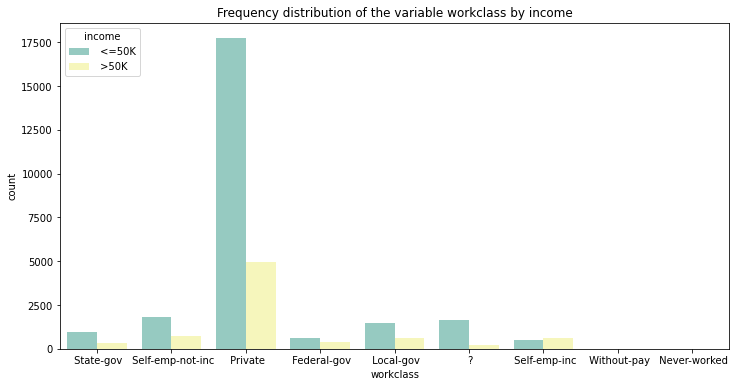

In [5]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set3")
ax.set_title("Frequency distribution of the variable workclass by income")
plt.show()

<h3> Пункт 2.6 Визуализировать совмещенные гистограммы объектов по признаку «workclass» для двух значений признака «sex» на одном.</h3>

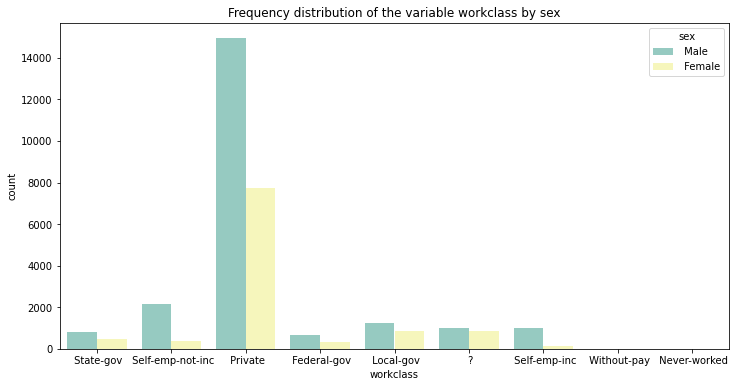

In [6]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set3")
ax.set_title("Frequency distribution of the variable workclass by sex")
plt.show()

<h3> Пункт 2.7 Визуализировать гистограмму объектов по признаку «age»;</h3>

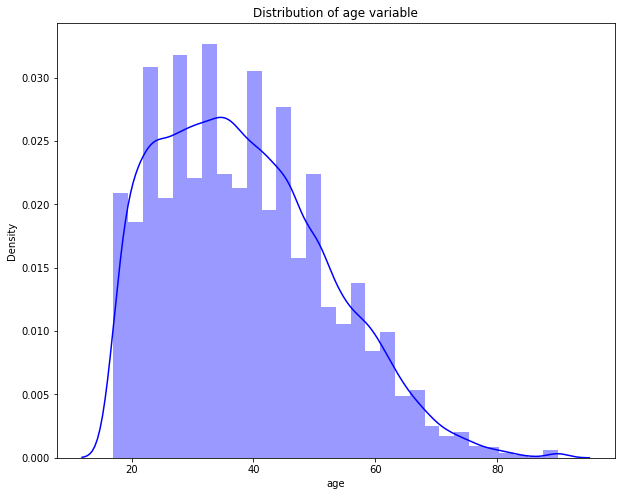

In [7]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=30, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

<h3> Пункт 2.8 Визуализировать распределение объектов по признаку «age», используя «ящик с усами»</h3>

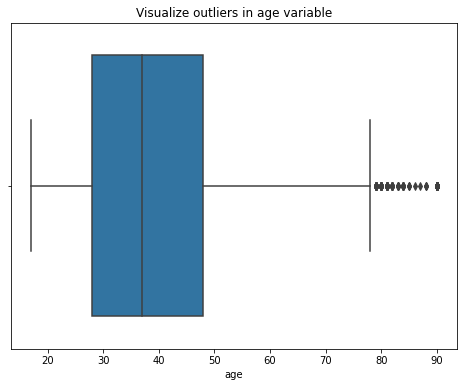

In [8]:
f, ax = plt.subplots(figsize=(8,6))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

<h3> Пункт 2.9 Визуализировать два «ящика с усами» по признаку «age» для двух значений признака «income» на одном графике;</h3>

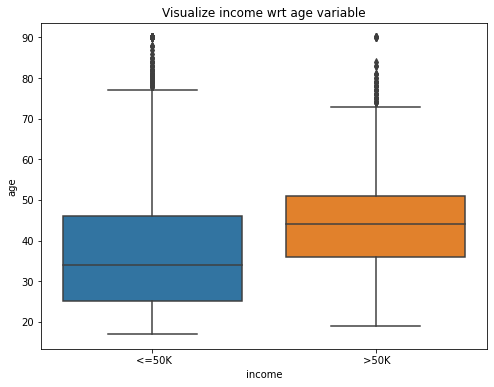

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

<h3>Пункт 2.10 Визуализировать четыре «ящика с усами» по признаку «age» для двух значений признака «income» и двух значений признака «sex» на одном графике.</h3>

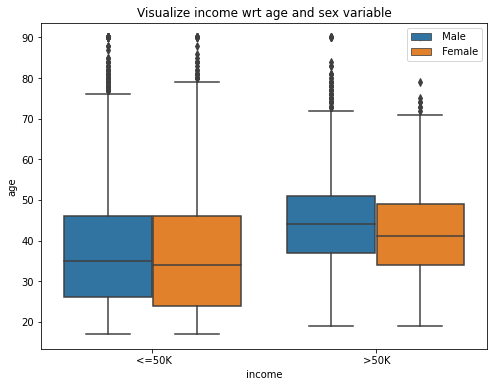

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<h3> Пункт 2.11 визуализировать «ящики с усами» для каждого из значений признака «race» по признаку «аge»;</h3>

Задача SVM максимизировать зазор, разделяющий классы. Ширина зазора считается по формуле:
<img src="source/ширина полосы.png">

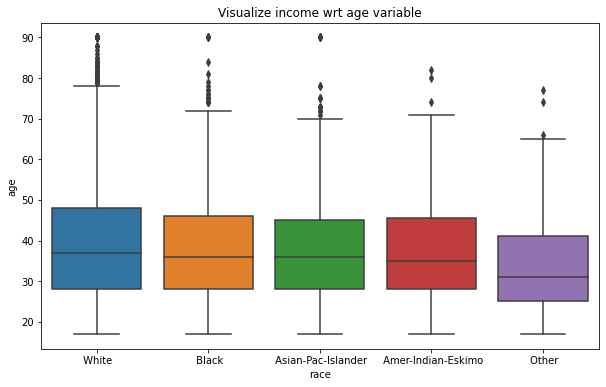

In [11]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="race", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

<h3> Пункт 2.12 Визуализировать тепловую карту корреляции признаков;</h3>

In [12]:
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


<h3> Пункт 2.13 Если в наборе данных пропущенные значения обозначены специальным символом, замените значения в таких ячейках на тип NaN</h3>


In [13]:
#Заменим значения, пропущенные в наборе данных на тип NaN
df.replace(' ?', np.NaN, inplace=True)
#Определим признаки, в которых есть пропущенные значения, посчитаем количество пропущенных значений по каждому признаку
print(df.isnull().sum()) #Напечатаем количество пропусков по каждому пункту

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


<h3> Пункт 2.14 Определить категориальные признаки в наборе данных.</h3>

In [14]:
#Определис категориальные признаки в наборе данных
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


<h3>Пункт 2.15 Определить числовые признаки в наборе данных.</h3>

In [15]:
#Определим числовые признаки в наборе данных
numbers = [var for var in df.columns if df[var].dtype!='O']
df[numbers].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [16]:
#Преобразование категориальных признаков в числовые
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


<h3>Пункт 3. Подготовить и разделить исходный набор данных на тренировочный и тестовый наборы, в качестве целевой переменной возьмите признак «income».</h3>

In [17]:
#Импортируем библиотеки, необходимые для проведения обучения модели решающего дерева
from sklearn import tree
from sklearn import metrics

# 3. Подготовим и разделим исходный набор данных на тренировочный и тестовый наборы, целевая переменная - признак «income»
y=df["income"]
X=df.drop(columns=(['income']))
# Разделить датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

<h3>Пункт 4. Обучить модель решающего дерева для задачи классификации, построить графики зависимости F-меры на обучающей выборке и на тестовой от глубины дерева. Найти оптимальную глубину дерева, варьируя ее в выбранном диапазоне. Построить для оптимальной модели матрицу ошибок.</h3>

max_depth - ограничение глубины дерева для уменьшения переобучения (pre-pruning)

С увеличением глубины уменьшается выборка ближе к листьям, так как важные решения(отнесение к классу) находятся в листьях, то увеличивается нестабильность.

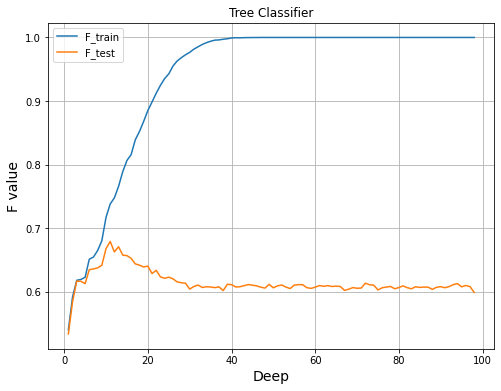

Наилучшая глубина дерева -  13 , с F-мерой  0.6791213303223157
Время работы алгоритма -  18.162413835525513  секунд


In [18]:
# 4. Обучение модели решающего дерева
t0 = time()
#Переменная, куда будем записывать высоту дерева и % правильных ответов на тестовой и тренировочной выборке
scores_data = pd.DataFrame()

# Задаем диапазон для поиска глубины дерева
tree_deep = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(tree_deep))
test_F = np.zeros(len(tree_deep))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор высоты дерева, меняя ее от 1 до 100
for mxd in tree_deep:
    #Создаем и обучаем дерево с жестко заданой высотой
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = mxd)
    clf.fit(X_train, y_train)
    #Определяем значение F-меры для тренировочной выборки  
    y_train_predict = clf.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train, y_train_predict)) /(metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train, y_train_predict))
    train_F[(mxd - 1)] = F_train
    #Определяем значение F-меры для тестовой выборки
    y_test_predict = clf.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict))/(metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F[(mxd - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = mxd
    
# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Tree Classifier")
ax.set_xlabel("Deep", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшая глубина дерева - ', (index_best_F + 1), ', с F-мерой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

In [21]:
# Построим матрицу ошибок для дерева оптимальной глубины
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = index_best_F)
clf.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

,predicted >50K,predicted <=50K
actual >50K,7425,704
actual <=50K,879,1738


<h3>Пункт 5. Обучить модель случайного леса для задачи классификации.</h3>

n_estimators - количество деревьев в лесу.

Cлучайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков. Практически не чувствителен к выбросам в данных из-за случайного сэмлирования
![Ttile](https://imgur.com/1e8WFbH.png)

Усреднение результатов по большему количеству деревьев позволит получить более устойчивый ансамбль за счет снижения переобучения. Однако  обратная сторона увеличения числа деревьев заключается в том, что с ростом количества деревьев требуется больше памяти и больше времени для обучения

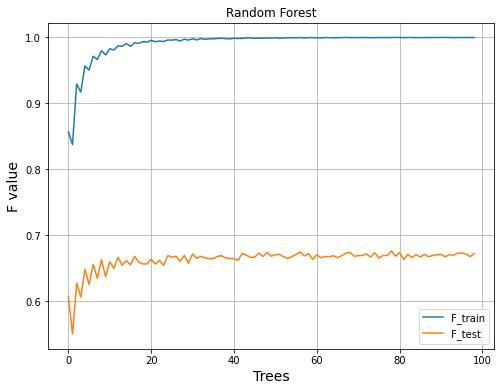

Наилучшее количество деревьев -  80 , с с F-мерой  0.6762105263157894
Время работы алгоритма -  145.7606599330902  секунд


In [20]:
# 5. Обучение модели случайного леса
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
t0 = time()
# Задаем диапазон для поиска количества деревьев
tree_number = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(tree_number))
test_F = np.zeros(len(tree_number))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор количества деревьев, меняя значения от 1 до 100
for t in tree_number:
    #Создаем и обучаем лес с жестко заданным количеством деревьев
    forest = RandomForestClassifier(n_estimators=t, bootstrap = True, max_features = 'sqrt')
    forest.fit(X_train, y_train)
    #Определяем значение F-меры для тренировочной выборки
    y_train_predict = forest.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train, y_train_predict)) /(metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train, y_train_predict))
    train_F[(t - 1)] = F_train
    #Определяем значение F-меры для тестовой выборки
    y_test_predict = forest.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict))/(metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F[(t - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = t
    
# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Random Forest")
ax.set_xlabel("Trees", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшее количество деревьев - ', (index_best_F + 1), ', с с F-мерой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

In [21]:
# Построим матрицу ошибок для леса с оптимальным количеством деревьев
forest = RandomForestClassifier(n_estimators=index_best_F, bootstrap = True, max_features = 'sqrt')
forest.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, forest.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

,predicted >50K,predicted <=50K
actual >50K,7607,553
actual <=50K,994,1592


<h3>Пункт 6. Обучить модель градиентного бустинга для задачи классификации</h3>

В отличие от случайного леса, который создает дерево решений для каждой выборки, в градиентном бустинге деревья создаются последовательно. Предыдущие деревья в модели не изменяются. Результаты предыдущего дерева используются для улучшения последующего, т.еобучение нового алгоритма осуществляется на тех объектах, где предыдущие ошиблись чаще(большие веса объектов)

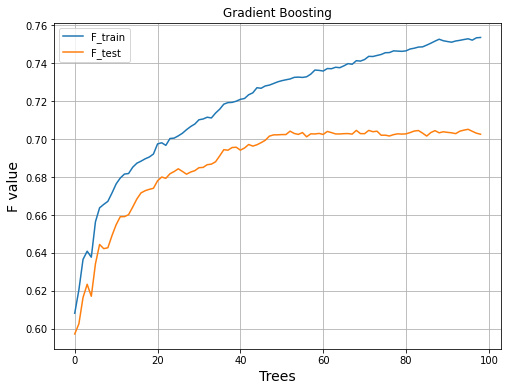

Наилучшее количество деревьев -  96 , с F-мерой  0.7051336444633007
Время работы алгоритма -  31.75055170059204  секунд


In [22]:
# 6. Обучение модели градиентного бустинга
import catboost
from catboost import CatBoostClassifier
t0 = time()
# Задаем диапазон для поиска количества деревьев в композиции
boost_number = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(boost_number))
test_F = np.zeros(len(boost_number))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор количества деревьев, меняя значения от 1 до 100
for b in boost_number:
    #Создаем и обучаем лес с жестко заданным количеством деревьев
    cat = CatBoostClassifier(learning_rate=0.5, loss_function='Logloss', n_estimators = b, logging_level=None)
    cat.fit(X_train, y_train, verbose = False)
    #Определяем значение F-меры для тренировочной выборки
    y_train_predict = cat.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train, y_train_predict)) / (metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train, y_train_predict))
    train_F[(b - 1)] = F_train
    #Определяем значение F-меры для тестовой выборки
    y_test_predict = cat.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict))/(metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F[(b - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = b
    
# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Gradient Boosting")
ax.set_xlabel("Trees", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшее количество деревьев - ', index_best_F, ', с F-мерой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

In [23]:
# Построим матрицу ошибок для леса с оптимальным количеством деревьев
cat = CatBoostClassifier(learning_rate=0.5, loss_function='Logloss', n_estimators = index_best_F, logging_level=None)
cat.fit(X_train, y_train, verbose = False)
confusion_matrix = metrics.confusion_matrix(y_test, cat.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

,predicted >50K,predicted <=50K
actual >50K,7694,466
actual <=50K,924,1662


<h2>Вывод по применению алгоритмов на основе решающих деревьев</h2>

<h3>Решаюшие деревья</h3>

Оптимальным значением глубины решающего дерева явлется <b>значение = 13, при этом F-мера = 0.67912. Время расчёта t = 18.162 c</b>

<h3>Случайный лес</h3>

Оптимальным значением количества решающих деревьев в композиции явлется <b>значение = 80, при этом F-мера = 0.67621</b>. Также заметно, что чем больше деревьев в композиции тем лучше, то это не означает, что лучше. Также время алгоритма намного больше чем в первом случае <b> t = 145.76 c</b>

<h3>Бустинг</h3>

Оптимальным значением количества решающих деревьев в композиции явлется <b>значение = 84, при этом F-мера = 0.70513</b>. Данное значение также улучшилось по сравнению со случайным лесом <b> t = 31.750 c</b>

<h2>Пункт 7-7.1 Обучение модели многослойного перцепторна</h2>
<h3>Пункт 7.1 Подготовка данных</h3>
<h3>Пункт 7.2. Обучение модели многослойного перцепторна. Обучить модель многослойного перцептрона для задачи классификации с оптимальными параметрами.</h3>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 activation_2 (Activation)   (None, 2)                 0

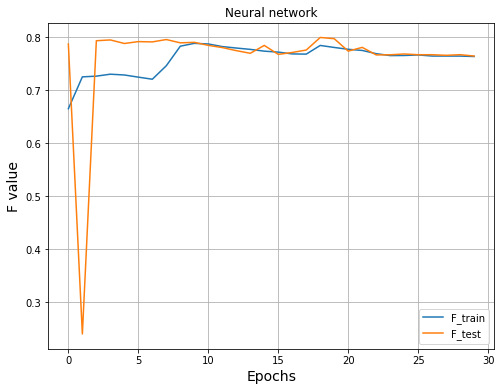

Наилучшая F-мера  0.7998325228691101
Время работы алгоритма -  42.60221886634827  секунд


In [19]:
# 7. Обучение модели многослойного перцепторна
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

y=df["income"]
X=df.drop(columns=(['income']))
# Разделить датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# 7.1 Подготовка данных для обучения нейросети
t0 = time()
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0
# Заполним пропущенные значения в данных. Сделаем это, выбрав наиболее часто встречающиеся значения признаков в качестве замены
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)
# Далее приведем данные к типу NumPy - numpy.ndarray
X_train = X_train.to_numpy(dtype=('float32'))
X_test = X_test.to_numpy(dtype=('float32'))
#Для задачи бинарной классификации, выразим вектор бинарных ответов двумя бинарными векторами (1 и 0)
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
# Выберем последовательную модель сборки и соберем архитектуру нейросети
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
#model.add(Dense(8))
#model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
# Скомпилируем модель
model.compile(loss='binary_crossentropy',optimizer = 'Nadam',metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train,batch_size = 32, epochs = EPOCHS,verbose = 1, validation_data = (X_test, y_test))
# После обучения считаем значение F-меры
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    f1_score_list_train.append(2 * history.history['precision'][i] *
    history.history['recall'][i] / (history.history['precision'][i] +
    history.history['recall'][i]))
    f1_score_list_test.append(2 * history.history['val_precision'][i] *
    history.history['val_recall'][i] / (history.history['val_precision'][i] +
    history.history['val_recall'][i]))
    if (f1_score_list_test[i] > best_F):
        best_F = f1_score_list_test[i]

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(f1_score_list_train, label='F_train')
ax.plot(f1_score_list_test, label='F_test')
ax.grid(True)
ax.set_title("Neural network")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшая F-мера ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

<h3>Пункт 7.2. Обучение модели многослойного перцепторна. Обучить модель многослойного перцептрона для задачи классификации с оптимальными параметрами.</h3>

In [23]:
# Прогноз по классам для построения матрицы ошибок
y_predict = np.argmax(model.predict(X_test), axis=-1)
history = model.fit(X_train, y_train,batch_size = 32, epochs = 30,verbose = 1, validation_data = (X_test, y_test))
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict)
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

Epoch 1/30
682/682 [==============================] - 1s 2ms/step - loss: 0.5476 - precision: 0.7622 - recall: 0.7622 - val_loss: 0.5406 - val_precision: 0.7694 - val_recall: 0.7694
Epoch 2/30
682/682 [==============================] - 1s 2ms/step - loss: 0.5418 - precision: 0.7684 - recall: 0.7684 - val_loss: 0.5437 - val_precision: 0.7739 - val_recall: 0.7739
Epoch 3/30
682/682 [==============================] - 1s 2ms/step - loss: 0.5448 - precision: 0.7668 - recall: 0.7668 - val_loss: 0.5399 - val_precision: 0.7696 - val_recall: 0.7696
Epoch 4/30
682/682 [==============================] - 1s 2ms/step - loss: 0.5510 - precision: 0.7655 - recall: 0.7655 - val_loss: 0.5408 - val_precision: 0.7676 - val_recall: 0.7676
Epoch 5/30
682/682 [==============================] - 1s 2ms/step - loss: 0.5502 - precision: 0.7618 - recall: 0.7618 - val_loss: 0.5408 - val_precision: 0.7678 - val_recall: 0.7678
Epoch 6/30
682/682 [==============================] - 1s 2ms/step - loss: 0.5467 - precisi

,predicted >50K,predicted <=50K
actual >50K,8193,0
actual <=50K,2504,49


<h2>Пункт 8. Повторим пункты 6-7 для набора данных модели MNIST</h2>

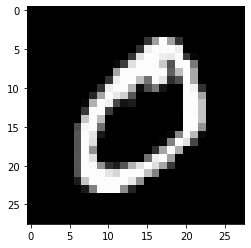

In [20]:
# 8. Повторим пункты 6-7 для набора данных MNIST
# Загрузите данные MNIST с помощью TensorFlow
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Визуализируем один из объектов
sample = 1
image = X_train[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
#Каждый объект представляет собой двумерный тензор 28х28 пикселей, его необходимо привести к одномерному вектору
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

<h3>Пункт 8.1 Алгоритм градиентного бустинга (Catboost) для модели MNIST</h3>

0:	learn: 1.3693570	total: 2.05s	remaining: 0us


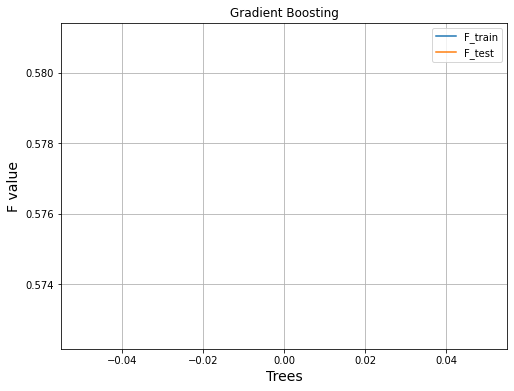

Наилучшее количество деревьев -  1 , с F-метрикой  0.581
Время работы алгоритма -  44.158183574676514  секунд


In [30]:
# 8.1 Алгоритм градиентного бустинга для модели MNIST
t0 = time()
# Задаем диапазон для поиска количества деревьев в композиции
boost_number = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(boost_number))
test_F = np.zeros(len(boost_number))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор количества деревьев, меняя значения от 1 до 100
for b in boost_number:
    #Создаем и обучаем лес с жестко заданным количеством деревьев
    cat = CatBoostClassifier(learning_rate=0.5, loss_function='MultiClass', n_estimators = b, logging_level=None)
    cat.fit(X_train, y_train)
    #Определяем значение F-метрики для тренировочной выборки
    y_train_predict = cat.predict(X_train)
    F_train = f1_score(y_train, cat.predict(X_train), average='micro')
    train_F[(b - 1)] = F_train
    #Определяем значение F-метрики для тестовой выборки
    y_test_predict = cat.predict(X_test)
    F_test = f1_score(y_test, cat.predict(X_test), average='micro')
    test_F[(b - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = b
    
# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Gradient Boosting")
ax.set_xlabel("Trees", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшее количество деревьев - ', index_best_F, ', с F-метрикой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

0:	learn: 1.3693570	total: 2.15s	remaining: 2.15s
1:	learn: 1.0041482	total: 4.14s	remaining: 0us


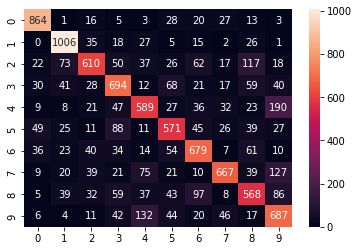

In [31]:
# Построим матрицу ошибок для леса с оптимальным количеством деревьев
cat = CatBoostClassifier(learning_rate=0.5, loss_function='MultiClass', n_estimators = index_best_F, logging_level=None)
cat.fit(X_train, y_train)
#Для более наглядной визуализации матрицы ошибок для многоклассового случая можно наложить на нее тепловую карту
confusion_matrix = metrics.confusion_matrix(y_test, cat.predict(X_test))
confusion_matrix = pd.DataFrame(data = confusion_matrix, columns = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9'], 
                  index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")

<h3>Пункт 8.2 Алгоритм нейронной сети для модели MNIST</h3>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                1650      
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 30)                1530      
                                                                 
 activation_5 (Activation)   (None, 30)               

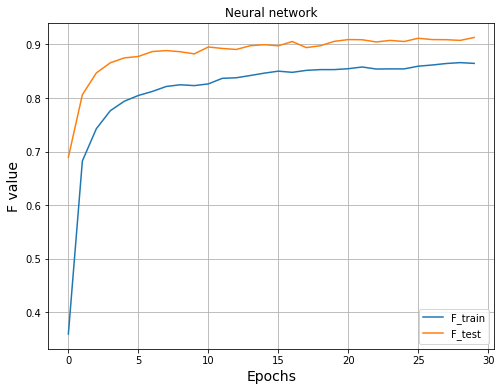

Наилучшая F-мера  0.9130059206063477
Время работы алгоритма -  111.7171561717987  секунд


In [21]:
# 8.2 Алгоритм нейронной сети для модели MNIST
t0 = time()
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0
# Заполним пропущенные значения в данных. Сделаем это, выбрав наиболее часто встречающиеся значения признаков в качестве замены
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)
# Для обучения нейронной сети преобразуем векторы ответов
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# Выберем последовательную модель сборки и соберем архитектуру нейросети
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
# Скомпилируем модель
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train,batch_size = 32, epochs = EPOCHS,verbose = 1, validation_data = (X_test, y_test))
# После обучения считаем значение F-меры
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    if ((history.history['precision'][i] + history.history['recall'][i]) > 0):
        f1_score_list_train.append(2 * history.history['precision'][i] * 
    history.history['recall'][i] / (history.history['precision'][i] +
    history.history['recall'][i]))
    else:
        f1_score_list_train.append(0)
    if ((history.history['val_precision'][i] + history.history['val_recall'][i]) > 0): #Вдруг precision и recall равны 0
        f1_score_list_test.append(2 * history.history['val_precision'][i] *
    history.history['val_recall'][i] / (history.history['val_precision'][i] +
    history.history['val_recall'][i]))
    else:
        f1_score_list_test.append(0)
    if (f1_score_list_test[i] > best_F):
        best_F = f1_score_list_test[i]
    
# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(f1_score_list_train, label='F_train')
ax.plot(f1_score_list_test, label='F_test')
ax.grid(True)
ax.set_title("Neural network")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшая F-мера ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

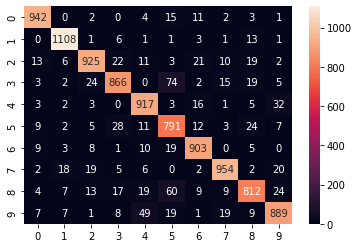

In [22]:
# Построим матрицу ошибок для нейронной сети
import seaborn as sns
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
#Для более наглядной визуализации матрицы ошибок для многоклассового случая можно наложить на нее тепловую карту
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = pd.DataFrame(data = confusion_matrix, columns = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9'], 
                  index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")

<h3>Вывод</h3>

В работе была проанализирована работа решающих дереввьев, случайного леса и град.бустинга для задачи классификации. Были выбраны по f1 мере оптимальные параметры для данных алгоритмов и построены матрицы ошибок. Можно сказать, что град.бустинг показал наилучший результат с увеличением кол-ва дереввьем, чем случайный лес.

Для решения данной задачи была составлена модель нейронной сети - многослойный перцептрон. Сеть состоит из 4 слоев нейронов. Данная модель показывает хорошее качество по угадыванию цифр, что видно на матрице ошибок. Была проанализировавна f1-мера от количества эпох. <b>F-мера 0.913  Время работы алгоритма  t = 111.717 с</b>